In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pickle
import os
import numpy as np

import cv2
from google.colab.patches import cv2_imshow

In [51]:
datasetFolder = '/content/drive/MyDrive/Project Datasets/Capstone Project/'
os.chdir(datasetFolder)

In [52]:
file = open(datasetFolder + 'RezisedLabel.pickle', 'rb')
dfLabelsCopy = pickle.load(file)
file.close()

In [53]:
dfLabelsCopy.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,256,256,66.0,38.0,54.0,95.0


In [54]:
# inputdir = '/content/drive/MyDrive/CapstoneDataSet/dataset/jpg_reshaped_train'
presentOutdir = datasetFolder + 'jpg_reshaped_train/present'
# AbsentOutdir = datasetFolder + 'jpg_reshaped_train/absent'

In [55]:
def show_img(patientId):
  points = np.array(dfLabelsCopy[dfLabelsCopy.patientId == patientId][['xo','yo','widtho','heighto']])

  img = cv2.imread(presentOutdir + '/' + patientId + '.jpg')

  for i in points:
    start = (int(i[0]), int(i[1]))
    end = (int(i[0]+i[2]) , int(i[1]+i[3]))
    color = (255,0,0)
    img = cv2.rectangle(img, start , end, color, 2)

  cv2_imshow(img)

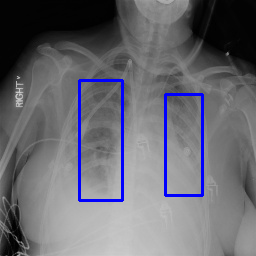

In [56]:
show_img('000db696-cf54-4385-b10b-6b16fbb3f985')

In [62]:
# !git clone https://github.com/pjreddie/darknet
os.chdir(datasetFolder+'darknet')
!make

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast obj/captcha.o obj/lsd.o obj/super.o obj/art.o obj/tag.o obj/cifar.o obj/go.o obj/rnn.o obj/segmenter.o obj/regressor.o obj/classifier.o obj/coco.o obj/yolo.o obj/detector.o obj/nightmare.o obj/instance-segmenter.o obj/darknet.o libdarknet.a -o darknet -lm -pthread  libdarknet.a
/usr/bin/ld: cannot open output file darknet: Is a directory
collect2: error: ld returned 1 exit status
Makefile:77: recipe for target 'darknet' failed
make: *** [darknet] Error 1


In [63]:
!pwd

/content/drive/My Drive/Project Datasets/Capstone Project/darknet


In [37]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-06-19 15:16:14--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  38.6MB/s    in 6.5s    

2021-06-19 15:16:21 (36.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [68]:
os.chdir('darknet')

In [113]:
!pwd

/content/drive/My Drive/Project Datasets/Capstone Project/darknet/darknet


In [114]:
!./darknet detect cfg/yolov3.cfg ../yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

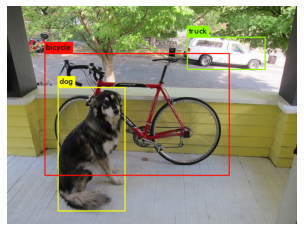

In [115]:
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = 'predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)

In [116]:
patientId = '000db696-cf54-4385-b10b-6b16fbb3f985'
imgPath = patientId + '.jpg'

!./darknet detect cfg/yolov3.cfg ../yolov3.weights ../../jpg_reshaped_train/present/000db696-cf54-4385-b10b-6b16fbb3f985.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

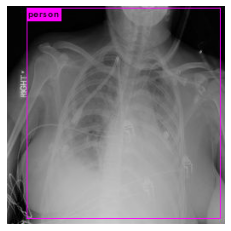

In [117]:
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = 'predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)

Reference for Yolo Method - Following GL Blog Article - Source - https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/

In [118]:
# Load Yolo
print("LOADING YOLO")
net = cv2.dnn.readNet("../yolov3.weights", "cfg/yolov3.cfg")
#save all the names in file o the list classes
classes = []
with open("data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
#get layers of the network
layer_names = net.getLayerNames()
#Determine the output layer names from the YOLO model 
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")

LOADING YOLO
YOLO LOADED


In [119]:
# Capture frame-by-frame
img = cv2.imread(presentOutdir + '/' + patientId + '.jpg')
#   img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# USing blob function of opencv to preprocess image
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
#Detecting objects
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

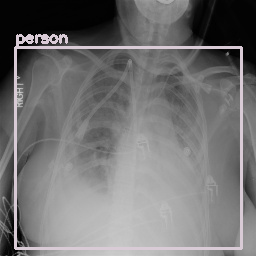

In [120]:
#We use NMS function in opencv to perform Non-maximum Suppression
#we give it score threshold and nms threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX,1/2, color, 2)
cv2_imshow(img)
# cv2.waitKey(0)

###### To generate xml annotations for the images

In [103]:
!pip install pascal-voc-writer

In [111]:
from pascal_voc_writer import Writer

# checking the code for 10 rows. this will need to be changed later
for index, row in dfLabelsCopy[:10].iterrows():

  # Writer(path, width, height)

  writer = Writer(presentOutdir + '/' +row['patientId'] + '.jpg',  row['Xo'], row['Yo'])

  # ::addObject(name, xmin, ymin, xmax, ymax)

  writer.addObject('opacity', row['xo'], row['yo'], row['xo'] +  row['widtho'], row['yo']+row['heighto'])

  # ::save(path)

  writer.save(datasetFolder + 'annotations/' + row['patientId'] + '.XML')

In [112]:
os.listdir(datasetFolder + 'annotations')

['0004cfab-14fd-4e49-80ba-63a80b6bddd6.XML',
 '00313ee0-9eaa-42f4-b0ab-c148ed3241cd.XML',
 '00322d4d-1c29-4943-afc9-b6754be640eb.XML',
 '003d8fa0-6bf1-40ed-b54c-ac657f8495c5.XML',
 '00436515-870c-4b36-a041-de91049b9ab4.XML',
 '00569f44-917d-4c86-a842-81832af98c30.XML',
 '006cec2e-6ce2-4549-bffa-eadfcd1e9970.XML',
 '00704310-78a8-4b38-8475-49f4573b2dbb.XML',
 '008c19e8-a820-403a-930a-bc74a4053664.XML',
 '009482dc-3db5-48d4-8580-5c89c4f01334.XML',
 '009eb222-eabc-4150-8121-d5a6d06b8ebf.XML',
 '00a85be6-6eb0-421d-8acf-ff2dc0007e8a.XML',
 '00aecb01-a116-45a2-956c-08d2fa55433f.XML',
 '00c0b293-48e7-4e16-ac76-9269ba535a62.XML',
 '00d7c36e-3cdf-4df6-ac03-6c30cdc8e85b.XML',
 '00f08de1-517e-4652-a04f-d1dc9ee48593.XML',
 '00f87de5-5fe0-4921-93ea-914d7e683266.XML',
 '0100515c-5204-4f31-98e0-f35e4b00004a.XML',
 '01027bc3-dc40-4165-a6c3-d6be2cb7ca34.XML',
 '010ccb9f-6d46-4380-af11-84f87397a1b8.XML',
 '011d6f51-b732-4d45-a84d-90477325ef2d.XML',
 '012a5620-d082-4bb8-9b3b-e72d8938000c.XML',
 '014b7b58